In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from utils import *
#import pickle
from mdp import MDP
from vi import VI

### Load data

In [2]:
data = np.load('data_ps3.npz')
environment_grid = data['environment']
s_ini = (0,0)
goal = (21,17)
epsilon = 0.4 #Propagation probability (see utils)

environment = Environment(environment_grid,s_ini,goal,epsilon)

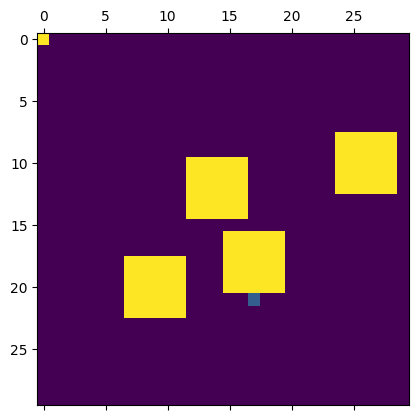

In [3]:
im = environment.plot_enviroment(s=s_ini,goal=goal)
plt.matshow(im)
plt.show()

**Task 1: Value Iteration $G^{\star}$**

A. (5 pts) Enumerate the action space. The coordinates of actions are a = (row,column).

In [4]:
print(f"Action space: {action_space}")

Action space: [(-1, 0), (0, -1), (1, 0), (0, 1)]


B. (5 pts) Re-formulate mathematically the optimal cost-to-go $G^{\star}(S)$ in recursive form. Note we are using the later notation discussed in class for the states $s \in S$ and actions $a \in A$, however, the objective is to minimize $G^{\star}$.

In lecture 5 we have the following formula: 

$$
G^{\star}_{k}(x_k) = \min_{u_k} \{ l(x_k,u_k) + G^{\star}_{k+1}(x_{k+1})\}
$$

So, in new notation it should be:

$$
G^{\star}(s) = \min_{a} \{l(s,a) + G^{\star} (s{\prime}) \}

C. (20 pts) Implement the **VI** algorithm for infinite length sequences. To show this, you are asked to include a picture of the final $G^{\star}$ (using **imshow()** for instance).

The cost of traversing each node l(s,a) = 1 only if propagation is possible (there is not obstacle or out of bounds)

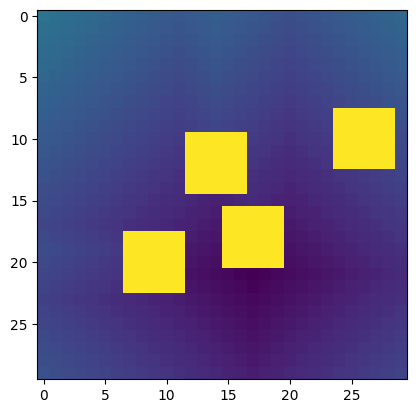

In [5]:
vi = VI(env=environment,goal=goal)
G = vi.calculate_value_function()
plt.imshow(G)
plt.show()

D. (5 pts) Formulate how to obtain the optimal policy $a^{\star} = \pi_{VI}(s)$ from $G^{\star}$
$$
a^* = \arg\min_{a \in A(s)} \left\{ l(s, a) + G^*(f(s, a)) \right\}
$$

E. (10 pts) Implement an algorithm to obtain the optimal policy $a^{\star}$ from $G^{\star}$. This policy can be a table. To test this, start at an initial position and execute the result of your policy and the transition function until you reach the goal. For simplicity, the step function is set to behave very close to a deterministic function ($\epsilon$ = 0.001). You will upload the video, that should be automatically generated if using the code in run.py

state  (0, 0)  iters  0
iters 0  action  2  state  (1, 0)
state  (1, 0)  iters  1
iters 1  action  2  state  (2, 0)
state  (2, 0)  iters  2
iters 2  action  2  state  (3, 0)
state  (3, 0)  iters  3
iters 3  action  2  state  (4, 0)
state  (4, 0)  iters  4
iters 4  action  2  state  (5, 0)
state  (5, 0)  iters  5
iters 5  action  2  state  (6, 0)
state  (6, 0)  iters  6
iters 6  action  2  state  (7, 0)
state  (7, 0)  iters  7
iters 7  action  2  state  (8, 0)
state  (8, 0)  iters  8
iters 8  action  2  state  (9, 0)
state  (9, 0)  iters  9
iters 9  action  2  state  (10, 0)
state  (10, 0)  iters  10
iters 10  action  2  state  (11, 0)
state  (11, 0)  iters  11
iters 11  action  2  state  (12, 0)
state  (12, 0)  iters  12
iters 12  action  2  state  (13, 0)
state  (13, 0)  iters  13
iters 13  action  2  state  (14, 0)
state  (14, 0)  iters  14
iters 14  action  2  state  (15, 0)
state  (15, 0)  iters  15
iters 15  action  2  state  (16, 0)
state  (16, 0)  iters  16
iters 16  action  2  

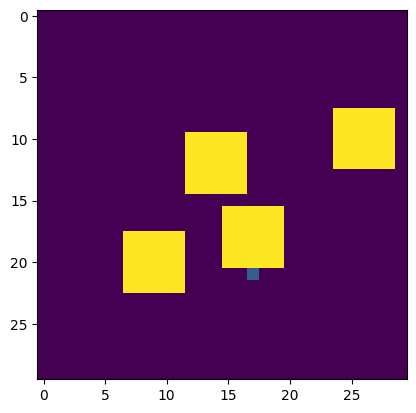

In [6]:
policies = vi.calculate_policy()
fig = plt.figure()
imgs = []
s = s_ini
environment.reset(s)
for iters in range(100):
    print('state ',s, ' iters ', iters)
    im = environment.plot_enviroment(s,goal)
    plot = plt.imshow(im)
    imgs.append([plot])
    a = vi.policy(s)
    s, _, safe_propagation, success = environment.step(action_space[a],epsilon=0.001)
    if not safe_propagation:
        print('Collision!!',s)
        break
    print('iters', iters, ' action ', a, ' state ', s)
    if success:
        print('Goal achieved in ', iters)
        im = environment.plot_enviroment(s,goal)
        plot = plt.imshow(im)
        imgs.append([plot])
        break

ani = animation.ArtistAnimation(fig, imgs, interval=100, blit=True)
ani.save('plan_vi.mp4')
#ani.save('plan_mdp.mp4')
plt.show()

**Task 2: Markov Decision Process (MDP)**

A. (5 pts) Formulate the optimal value function $v^{\star}(s)$ in recursive form.

$$
v^{\star}(s) = \max_{a \in A(s)} \left\{ r(s, a, s{\prime}) + \gamma \sum_{s{\prime}} P(s{\prime}|s, a) v^{\star}(s{\prime}) \right\}
$$

B. (5 pts) Formulate how to obtain the greedy deterministic policy $a^* = \pi_{MDP}(s).$

$$
a^* = \pi_{MDP}(s) = \arg\max_{a \in A(s)} \left\{ r(s, a, s{\prime}) + \gamma \sum_{s{\prime}} P(s{\prime}|s, a) v^*(s{\prime}) \right\}
$$

C. (20 pts) Implement the MDP optimal value function until convergence of $v^{\star}$ using the same criterion as in 1.C. Include in your report a picture of the values $v^{\star}$.
Note: Now, instead of cost, we will work with rewards having the objective of maximizing the return. Also, we have to assign some values, in this case, we recommend to start the algorithm with $v(sgoal) = 1$, the reward to collide with an obstacle or out of bounds $r(s^{\prime} = obstacle) = −1$ (it also includes out of bounds) and the successful transition $r(s^{\prime} = free) = 0$

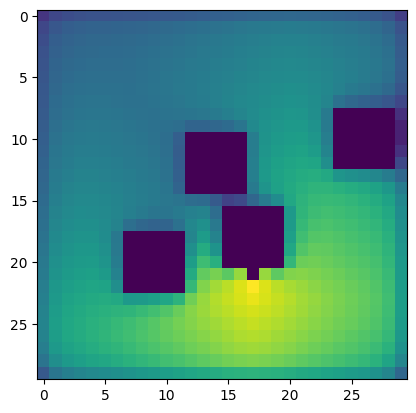

array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 1],
       [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 1, 1],
       [3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 1, 1, 1],
       [3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 1, 1, 1, 1, 1],
       [3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
        2, 1, 1, 1, 1, 1, 1, 1],
       [3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
        2, 1, 1, 1, 1, 1, 1, 1],
       [3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
        1, 1, 1, 1, 0, 0, 1, 1],
       [3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
        1, 1, 1, 0, 0, 0, 0, 1],
       [3, 3, 3, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 2, 2, 2,
        1, 1, 0, 0, 0, 0, 0, 0],
       [3, 3, 3, 2, 2, 2, 2, 2, 1, 1,

In [9]:
mdp = MDP(env=environment,goal=goal,gamma=0.99)
V = mdp.calculate_value_function()
plt.imshow(V)
plt.show()
mdp.calculate_policy()


state  (0, 0)  iters  0
iters 0  action  2  state  (1, 0)
state  (1, 0)  iters  1
iters 1  action  3  state  (1, 1)
state  (1, 1)  iters  2
iters 2  action  2  state  (2, 1)
state  (2, 1)  iters  3
iters 3  action  3  state  (2, 2)
state  (2, 2)  iters  4
iters 4  action  2  state  (3, 2)
state  (3, 2)  iters  5
iters 5  action  3  state  (3, 3)
state  (3, 3)  iters  6
iters 6  action  2  state  (4, 3)
state  (4, 3)  iters  7
iters 7  action  2  state  (5, 3)
state  (5, 3)  iters  8
iters 8  action  2  state  (6, 3)
state  (6, 3)  iters  9
iters 9  action  2  state  (7, 3)
state  (7, 3)  iters  10
iters 10  action  2  state  (8, 3)
state  (8, 3)  iters  11
iters 11  action  2  state  (9, 3)
state  (9, 3)  iters  12
iters 12  action  2  state  (10, 3)
state  (10, 3)  iters  13
iters 13  action  2  state  (11, 3)
state  (11, 3)  iters  14
iters 14  action  2  state  (12, 3)
state  (12, 3)  iters  15
iters 15  action  2  state  (13, 3)
state  (13, 3)  iters  16
iters 16  action  2  state 

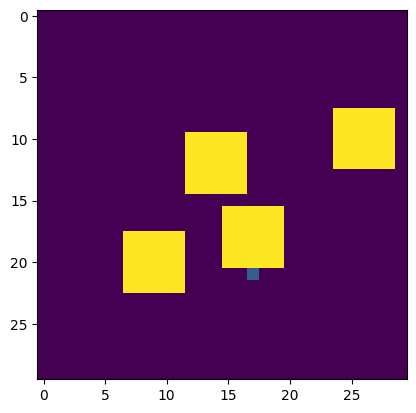

In [10]:
fig = plt.figure()
imgs = []
s = s_ini
environment.reset(s)
for iters in range(100):
    print('state ',s, ' iters ', iters)
    im = environment.plot_enviroment(s,goal)
    plot = plt.imshow(im)
    imgs.append([plot])
    a = mdp.policy(s)
    s, _, safe_propagation, success = environment.step(action_space[a],epsilon=0.001)
    if not safe_propagation:
        print('Collision!!',s)
        break
    print('iters', iters, ' action ', a, ' state ', s)
    if success:
        print('Goal achieved in ', iters)
        im = environment.plot_enviroment(s,goal)
        plot = plt.imshow(im)
        imgs.append([plot])
        break

ani = animation.ArtistAnimation(fig, imgs, interval=100, blit=True)
ani.save('plan_mdp.mp4')
plt.show()